In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
if not os.path.exists('datasets/brazil-weather/sample.csv'): 
    seed = 42
    pd.read_csv('conventional_weather_stations_inmet_brazil_1961_2019.csv', sep=';', encoding='latin1') \
        .sample(n=30000, random_state=seed) \
        .to_csv('datasets/brazil-weather/sample.csv', index=False)
df = pd.read_csv('datasets/brazil-weather/sample.csv')
df.info()

# or import the data from the original file
# df = pd.read_csv('conventional_weather_stations_inmet_brazil_1961_2019.csv', sep=';', encoding='latin1')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Estacao                    30000 non-null  int64  
 1   Data                       30000 non-null  object 
 2   Hora                       30000 non-null  int64  
 3   Precipitacao               10114 non-null  float64
 4   TempBulboSeco              28900 non-null  float64
 5   TempBulboUmido             27748 non-null  float64
 6   TempMaxima                 9556 non-null   float64
 7   TempMinima                 9718 non-null   float64
 8   UmidadeRelativa            27946 non-null  float64
 9   PressaoAtmEstacao          24364 non-null  float64
 10  PressaoAtmMar              9378 non-null   float64
 11  DirecaoVento               27002 non-null  float64
 12  VelocidadeVento            27511 non-null  float64
 13  Insolacao                  8662 non-null   flo

In [4]:
df.columns

Index(['Estacao', 'Data', 'Hora', 'Precipitacao', 'TempBulboSeco',
       'TempBulboUmido', 'TempMaxima', 'TempMinima', 'UmidadeRelativa',
       'PressaoAtmEstacao', 'PressaoAtmMar', 'DirecaoVento', 'VelocidadeVento',
       'Insolacao', 'Nebulosidade', 'Evaporacao Piche', 'Temp Comp Media',
       'Umidade Relativa Media', 'Velocidade do Vento Media', 'Unnamed: 19'],
      dtype='object')

In [5]:
# ['Estacao', 'Data', 'Hora', 'Precipitacao', 'TempBulboSeco',
#        'TempBulboUmido', 'TempMaxima', 'TempMinima', 'UmidadeRelativa',
#        'PressaoAtmEstacao', 'PressaoAtmMar', 'DirecaoVento', 'VelocidadeVento',
#        'Insolacao', 'Nebulosidade', 'Evaporacao Piche', 'Temp Comp Media',
#        'Umidade Relativa Media', 'Velocidade do Vento Media', 'Unnamed: 19']

df.rename(columns={
    'Estacao': 'estacion',
    'Data': 'fecha',
    'Hora': 'hora',
    'Precipitacao': 'precipitacion',
    'TempBulboSeco': 'temp_bulbo_seco',
    'TempBulboUmido': 'temp_bulbo_hum',
    'TempMaxima': 'temp_max',
    'TempMinima': 'temp_min',
    'UmidadeRelativa': 'humedad_relativa',
    'PressaoAtmEstacao': 'presion_atm_estacion',
    'PressaoAtmMar': 'presion_atm_mar',
    'DirecaoVento': 'dir_viento',
    'VelocidadeVento': 'vel_viento',
    'Insolacao': 'insolacion',
    'Nebulosidade': 'nebulosidad',
    'Evaporacao Piche': 'evaporacion_piche',
    'Temp Comp Media': 'temp_comp_media',
    'Umidade Relativa Media': 'humedad_relativa_media',
    'Velocidade do Vento Media': 'vel_viento_media'
}, inplace=True)

### Transformando los tipos de datos a los correspondientes en base a la naturaleza del dato

La columna fecha es de tipo 'object'. Sabemos que se trata de una fecha, y hay un tipo de dato en pandas especifico para este tipo de datos.

Convirtamos la columna fecha a datetime64

In [6]:
df['fecha']

0        09/07/2018
1        19/03/1982
2        17/01/1981
3        11/02/2003
4        03/01/2014
            ...    
29995    20/02/2019
29996    22/09/2002
29997    15/03/2003
29998    19/11/1973
29999    14/11/1993
Name: fecha, Length: 30000, dtype: object

In [19]:
# transformar fecha a datetime
df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y') # indicamos el formato de la fecha
df['fecha']

0       2018-07-09
1       1982-03-19
2       1981-01-17
3       2003-02-11
4       2014-01-03
           ...    
29995   2019-02-20
29996   2002-09-22
29997   2003-03-15
29998   1973-11-19
29999   1993-11-14
Name: fecha, Length: 30000, dtype: datetime64[ns]

### Direccion del viento codificada

El dataset contiene una columna con codigos para las direcciones del viento. Estos codigos se pueden mapear con el archivo wind_directions_codes.csv, que se disponibilizo junto con el dataset de estaciones. Vamos a practicar la operacion merge y unir estos datasets para mapear los codigos del dataset original y construir las columnas dir_viento_desc y dir_viento_simb que representaran la descripcion y el simbolo correspondiente a cada codigo.

In [24]:
# convertir columna dir_viento de float a int
df['dir_viento'] = df['dir_viento'].astype('Int64')
df['dir_viento']

# leer codigos de viento. Renombrar columnas a español
wind_codes = pd.read_csv('wind_directions_codes.csv', sep=';', encoding='utf-8').rename(columns={
    'Id': 'id',
    'Descrição': 'descripcion',
    'Símbolo': 'simbolo'
})

# unir codigos de viento con el dataframe
df['dir_viento_desc'] = df.merge(wind_codes, left_on='dir_viento', right_on='id', how='left')['descripcion']
df['dir_viento_simb'] = df.merge(wind_codes, left_on='dir_viento', right_on='id', how='left')['simbolo']

# visualizar resultados
df.head(10)

,estacion,fecha,hora,precipitacion,temp_bulbo_seco,temp_bulbo_hum,temp_max,temp_min,humedad_relativa,presion_atm_estacion,...,vel_viento,insolacion,nebulosidad,evaporacion_piche,temp_comp_media,humedad_relativa_media,vel_viento_media,Unnamed: 19,dir_viento_desc,dir_viento_simb
0,83398,09/07/2018,0,NaN,22.6,NaN,NaN,NaN,97.0,1018.6,...,0.0,7.2,7.5,NaN,NaN,86.25,1.371840,NaN,NaN,NaN
1,83470,19/03/1982,0,NaN,21.6,20.2,31.8,NaN,88.0,927.1,...,2.1,6.9,10.0,2.1,25.3,77.00,1.033333,NaN,Oeste,W
2,82784,17/01/1981,1800,NaN,32.4,21.6,NaN,NaN,36.0,963.0,...,2.1,NaN,3.0,NaN,NaN,NaN,NaN,NaN,Leste,E
3,82588,11/02/2003,0,NaN,26.9,22.8,33.2,NaN,70.0,1007.2,...,1.1,7.9,9.0,3.4,27.3,69.50,3.033333,NaN,Leste,E
4,83244,03/01/2014,0,NaN,26.8,22.6,32.8,NaN,69.0,982.9,...,NaN,9.8,0.0,NaN,26.0,71.00,NaN,NaN,NaN,NaN
5,83582,25/10/2011,1800,NaN,28.6,21.0,NaN,NaN,49.0,933.6,...,2.1,NaN,4.0,NaN,NaN,NaN,NaN,NaN,Nordeste,NE
6,83912,15/06/1974,1800,NaN,10.6,10.4,NaN,NaN,98.0,965.2,...,1.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,Nordeste,NE
7,82376,23/03/2008,0,NaN,26.6,25.3,NaN,NaN,90.0,1006.1,...,1.5,4.4,10.0,2.0,NaN,85.00,1.933333,NaN,Este - Nordeste,ENE
8,82590,17/04/1970,1800,NaN,34.4,24.4,NaN,NaN,41.0,NaN,...,0.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,83687,10/06/1972,1200,0.0,15.0,14.2,NaN,12.3,92.0,916.3,...,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Leste,E


### Tenemos datos faltantes? Que podemos hacer con ellos?

La columna dir_viento contiene nulos en algunos casos. A primera impresion, parece dificil imputar este dato ya que si no viene en el dataset original entonces no podemos inventar informacion. Pero pensemos un poco en la naturaleza de los datos. Si una estacion esta muy cercana de otra, probablemente las metricas de cada una sean parecidas, o al menos no estariamos muy equivocados al decir que lo son. Se podria llegar a hacer una imputacion de los datos faltantes en direccion de viento, o cualquier otra columna de metricas de la estacion, en caso de ser necesario, usando algun estadistico de los datos de estaciones cercanas. No vamos a desarrollar este ejemplo en este notebook, ya que para buscar las estacione cercanas tendriamos que involucrar librerias de datos espaciales, que no entran al alcance de este curso. Solo quiero dejar mencionado que siempre que se necesiten imputar los datos, lo mas importante es entender la naturaleza de los mismos, y siempre que se pueda, buscar la opinion de un experto.

### Momento funcional: que hicimos hasta ahora que podamos necesitar mas tarde?

vamos a definir una funcion de preproceso, un pipeline que haga todo lo que hicimos recien en una sola secuencia de instrucciones. Cuando querramos usar otro sample de datos disitntos o todo el dataset entero, podemos volver a usar esta funcion para preprocesarla.

In [45]:
def preprocess(df):
    df = df.rename(columns={
        'Estacao': 'estacion',
        'Data': 'fecha',
        'Hora': 'hora',
        'Precipitacao': 'precipitacion',
        'TempBulboSeco': 'temp_bulbo_seco',
        'TempBulboUmido': 'temp_bulbo_hum',
        'TempMaxima': 'temp_max',
        'TempMinima': 'temp_min',
        'UmidadeRelativa': 'humedad_relativa',
        'PressaoAtmEstacao': 'presion_atm_estacion',
        'PressaoAtmMar': 'presion_atm_mar',
        'DirecaoVento': 'dir_viento',
        'VelocidadeVento': 'vel_viento',
        'Insolacao': 'insolacion',
        'Nebulosidade': 'nebulosidad',
        'Evaporacao Piche': 'evaporacion_piche',
        'Temp Comp Media': 'temp_comp_media',
        'Umidade Relativa Media': 'humedad_relativa_media',
        'Velocidade do Vento Media': 'vel_viento_media'
    })
    df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y')
    df['dir_viento'] = np.floor(pd.to_numeric(df['dir_viento'], errors='coerce')).astype('Int64')
    wind_codes = pd.read_csv('wind_directions_codes.csv', sep=';', encoding='utf-8').rename(columns={
        'Id': 'id',
        'Descrição': 'descripcion',
        'Símbolo': 'simbolo'
    })
    df['dir_viento_desc'] = df.merge(wind_codes, left_on='dir_viento', right_on='id', how='left')['descripcion']
    df['dir_viento_simb'] = df.merge(wind_codes, left_on='dir_viento', right_on='id', how='left')['simbolo']
    return df

Podemos incluso ir mas lejos, hacia un enfoque mas funcional todavia, donde cada etapa del pipeline es una funcion en si misma. Puede quedar como ejercicio. 

## Evolucion de los datos

Teniendo una columna fecha y sabiendo que se toman distintas muestras de cada estacion segun el tiempo, construyamos series temporales de algunas estaciones para ver la evolucion de sus metricas en el tiempo. Recordemos que al estar trabajando con un sample del dataset, no vamos a estar viendo todas las ocurrencias de medicion sobre esta estacion, sino solo una parte. Vamos a trabajar con todo el dataset para tener la pelicula completa


In [46]:
df = pd.read_csv('datasets/brazil-weather/conventional_weather_stations_inmet_brazil_1961_2019.csv', sep=';', encoding='utf-8')
df = preprocess(df)

Tarda, no? en este notebook no estamos aprovechando las posibilidades que nos puede brindar pyspark para una lectura y procesamiento mas veloz, pero pronto cuando usemos pyspark vamos a poder notar la diferencia


Primero visualicemos los datos en perspectiva de una unica estacion. 

In [47]:
df[df['estacion'] == 82588]

,estacion,fecha,hora,precipitacion,temp_bulbo_seco,temp_bulbo_hum,temp_max,temp_min,humedad_relativa,presion_atm_estacion,...,vel_viento,insolacion,nebulosidad,evaporacion_piche,temp_comp_media,humedad_relativa_media,vel_viento_media,Unnamed: 19,dir_viento_desc,dir_viento_simb
9092142,82588,1962-10-01,0,NaN,NaN,NaN,37.8,NaN,NaN,NaN,...,NaN,10.1,NaN,NaN,29.06,54.25,4.666667,NaN,NaN,NaN
9092143,82588,1962-10-01,1200,NaN,31.6,22.8,NaN,23.1,45.0,NaN,...,6.00000,NaN,4.00,NaN,NaN,NaN,NaN,NaN,SudesteSE,NaN
9092144,82588,1962-10-01,1800,NaN,37.2,23.4,NaN,NaN,28.0,NaN,...,6.00000,NaN,3.00,NaN,NaN,NaN,NaN,NaN,SudesteSE,NaN
9092145,82588,1962-10-02,0,NaN,26.4,22.8,36.2,NaN,72.0,NaN,...,2.00000,9.7,0.00,NaN,27.88,57.50,4.000000,NaN,Leste,E
9092146,82588,1962-10-02,1200,0.0,29.2,22.8,NaN,22.0,56.0,NaN,...,6.00000,NaN,5.00,NaN,NaN,NaN,NaN,NaN,SudesteSE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142095,82588,2019-12-29,0,NaN,27.6,NaN,NaN,NaN,78.0,1005.5,...,3.08664,NaN,0.00,NaN,NaN,NaN,NaN,NaN,Nordeste,NE
9142096,82588,2019-12-30,0,NaN,NaN,NaN,37.2,NaN,NaN,NaN,...,NaN,2.3,NaN,NaN,28.54,75.00,3.086640,NaN,NaN,NaN
9142097,82588,2019-12-30,1200,1.4,28.8,NaN,NaN,21.1,74.0,1005.0,...,3.08664,NaN,10.00,NaN,NaN,NaN,NaN,NaN,Leste,E
9142098,82588,2019-12-31,0,NaN,27.8,NaN,34.4,NaN,77.0,1004.8,...,3.08664,5.3,8.75,NaN,28.10,82.00,2.057760,NaN,Nordeste,NE


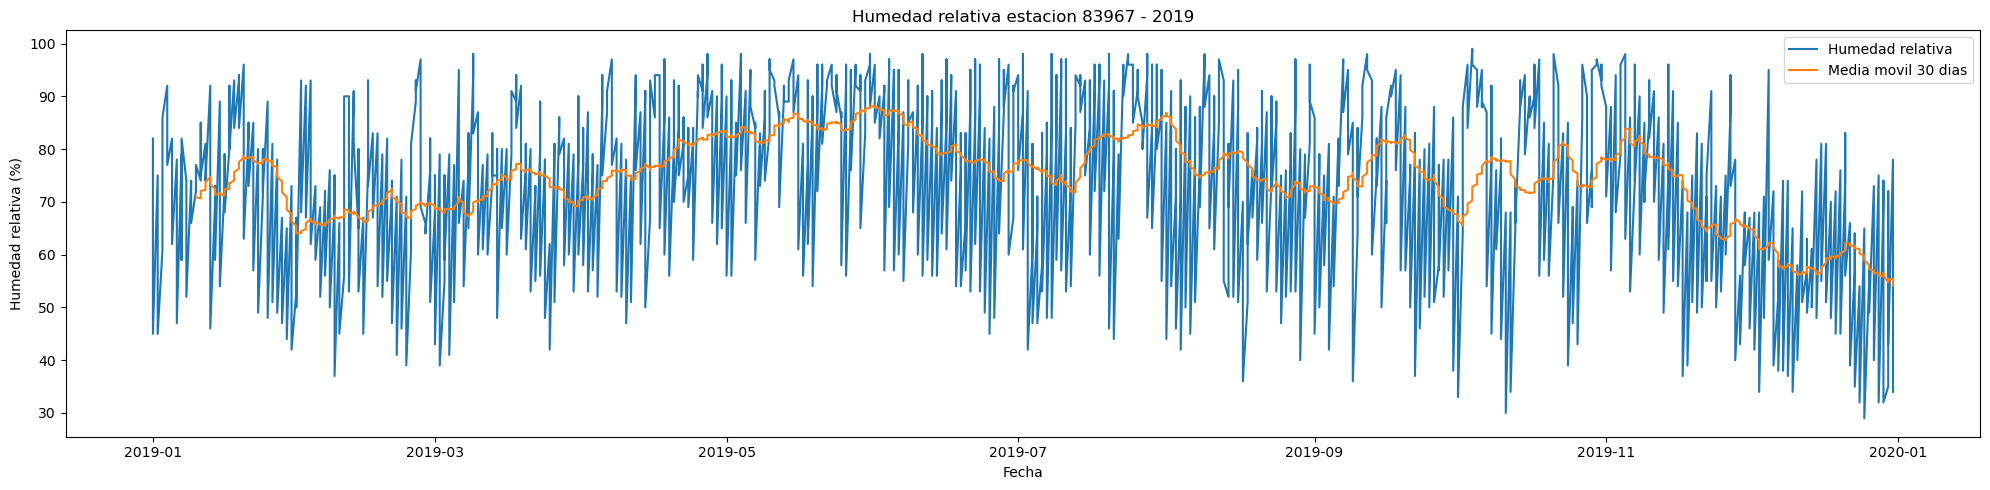

In [61]:
# serie temporal de la humedad relativa para la estacion 83967 a lo largo del año 2019

# definimos el tamaño de la figura
plt.figure(figsize=(20, 5))

# seleccionamos los datos de la estacion 83967
df_83967 = df[df['estacion'] == 83967]

# seleccionamos los datos de 2019
df_83967_2019 = df_83967[(df_83967['fecha'] >= '2019-01-01') & (df_83967['fecha'] <= '2019-12-31')]

# graficamos la serie temporal
plt.plot(df_83967_2019['fecha'], df_83967_2019['humedad_relativa'], label='Humedad relativa')

# agregamos linea de tendencia
plt.plot(df_83967_2019['fecha'], df_83967_2019['humedad_relativa'].rolling(window=30).mean(), label='Media movil 30 dias')

# agregamos etiquetas
plt.title('Humedad relativa estacion 83967 - 2019')
plt.xlabel('Fecha')
plt.ylabel('Humedad relativa (%)')
plt.tight_layout()
plt.legend()
plt.show()